# ***Neural Networks From Scratch***
------------------

In [88]:
# tutorial following https://www.youtube.com/watch?v=w8yWXqWQYmU
# using both MNIST and Fashion-MNIST datasets

# ***Digit classification using MNIST***
-------------------

![MNIST](./MNIST/MnistExamplesModified.png)

In [4]:
# each image is a black and white 28 x 28 pixels array of 8 bit unsigned integers (8 bit pixel depth)
# pixel values range from 0 (white) to 255 (black)

# pixels per image
# 28 x 28 = 784

In [1]:
# we could visualize the images as a matrix with N rows for each image with PPIMAGE number of columns
# when we transpose this we get a matrix where each column is made of PPIMAGE pixels from each image and 
# each row represents nth pixel from every image

# n - total number of pixels
# N - total number of images

# $${\underbrace{\begin{bmatrix}
X_{0} \dots X_{784} \\
X_{785} \dots X_{1568} \\
\dots \\
\dots \\
\dots \\
\dots \\
X_{n - 784} \dots X_{n}\\
\end{bmatrix}}_{N \times 784}}^T = 
\underbrace{\begin{bmatrix}
X_{0} & X_{785} & \dots & X_{n - 784}\\
\vdots & \vdots & \vdots & \vdots \\
X_{784} & X_{1568} & \dots & X_{n}\\
\end{bmatrix}}_{784 \times N}
$$

In [5]:
# our predictions will be the digit class (0..9)!
# we'll start with a simple neural network with just 3 layers.

# one input layer with 784 nodes (0th layer)
# one hidden layer with 10 nodes (1st layer)
# and an output layer with 10 nodes (2nd layer)

In [6]:
# the input layer does not really have any parameters.
# it's just the inputs.
# every node in the input layer corresponds to each of the pixel in the image, hence 784 nodes.
# similarly, the output layer corresponds to each of the 10 digits that could be recognized, hence 10 nodes.

In [2]:
# Neural network with just one hidden layer

# $$I \Longrightarrow H \Longrightarrow O$$

In [ ]:
# In a neural network nodes hold results and connections hold weights

# ***Math: Forward propagation***
------------------

# $\underbrace{M}_{R \times C}$

In [12]:
# matrix dimension notation:

# R = |rows|
# C = |columns|

In [27]:
# forward propagation
# N is the number of images in the dataset

# I represents the input layer, that takes in the raw pixels
# we are passing images one by one

## $\underbrace{I}_{784 \times N} = |pixels| \times |images|$

In [11]:
# H is the hidden layer

# H is the unactivated hidden layer
# W is the weights of the connections between the 784 nodes in the input layer and the 10 nodes in the hidden layer
# I is input layer (representing N images each with 784 pixels)
# W x A is the matrix dot product of W and A
# B is constant bias values for each node in the hidden layer

## $\underbrace{H}_{10 \times N} = \underbrace{W}_{784 \times 10} \cdot \underbrace{I}_{784 \times N} + \underbrace{B}_{10 \times 1}$

In [28]:
# H hat is the activated hidden layer

# H hat is the result of applying an activation function to the unactivated the hidden layer

## $\underbrace{\hat{H}}_{10 \times N} = \underbrace{f_{activation}(H)}_{10 \times N}$

In [30]:
# there are multiple activation functions available
# our choice for the activation fucntion will be ReLU (Rectified Linear Unit)
# so, H hat becomes,

## $\underbrace{\hat{H}}_{10 \times N} = \underbrace{ReLU(H)}_{10 \times N}$

## $$ReLU(x): ~ x ~ if ~ (x > 0) ~ else ~ 0$$

In [ ]:
# ReLu is a very simple function, it returns x when x > 0 and returns 0 when x <= 0

In [ ]:
# without an activation function, a neural network won't be able to do anything extraordinary
# if all we did was to add layers with weights and biases, we'll end up with a fancy liner combination of weights and biases anda t i o n  r
# i.e a glorified linear regression model
# the activation function is what makes neural networks stand out.

In [7]:
# O is our unactivated output layer

# w is the weights of connections between each node in the hidden layer and each node in the output layer
# H hat is the activated hidden layer
# b is constant bias term for each node in the output layer

## $\underbrace{O}_{10 \times N} = \underbrace{w}_{10 \times 10} \cdot \underbrace{\hat{H}}_{10 \times N} + \underbrace{b}_{10 \times 1}$

In [35]:
# O hat is the activated output layer

# the activation function we choose to use here is softmax
# softmax function turns the output layer into probabilities
# this distributes probabilities for each of the node in the output layer, corresponding to the 10 digit labels
# sum of all these 10 probabilities will be 1.0
# the node with the highest probability will be picked as the label for the given image (array of pixels)

## $\underbrace{\hat{O}}_{10 \times 1} = \underbrace{f_{softmax}(O)}_{10 \times 1}$

In [ ]:
# values of each node in the output layer gets transformed into probabilities for each label

## $$softmax(\underbrace{\begin{bmatrix}
0.9 \\
1.7 \\
8.4 \\
\vdots \\
2.1 \\
8.5 \\
9.1 \\
\end{bmatrix}}_{10 \times 1}) = 
\underbrace{\begin{bmatrix}
0.10 \\
0.23 \\
0.00 \\
\vdots \\
0.74 \\
0.01 \\
0.01 \\
\end{bmatrix}}_{10 \times 1}$$

In [ ]:
# in the above example, we'll pick 7 as the label for the given image

In [36]:
# softmax activation function:

# $$softmax = \frac{e^{\hat{O}{i}}}{\sum_{j = 1}^{K} e^{\hat{O}{j}}}$$

In [ ]:
# K is the dimension of the softmax activated layer
# in our case K = 10
# softmax result is equal to e^(node of choice) / sum of e^(node) for all nodes in the softmax activated layer
# after the softmax activation, each output will be in the range of 0 and 1.

# ***Math: Back propagation***
------------------

In [37]:
# now that we have our predictions, we'll move backwards to compute how much our prediction deviates from the true label (using the training lables)
# we'll then determine how much each previous weights and biases contributed to this deviation and
# we'll tune those parameters accordingly to lower this difference in the next iteration.
# we'll continue doing this until we get the lowest possible/acceptable errors (biases)

In [38]:
# dO is error of the output layer
# we'll subtract the true label from the softmax result
# since softmax result is an array of probabilities, we'll one hot encode the true label and do an elementwise subtraction

## $$prediction = \underbrace{\begin{bmatrix}
0.01 \\
0.05 \\
0.69 \\
\vdots \\
0.00 \\
0.10 \\
0.07 \\
\end{bmatrix}}_{10 \times 1}
$$

In [9]:
# suppose our true label was 2

## $$\text{one hot encoded label} = \underbrace{\begin{bmatrix}
0 \\
0 \\
1 \\
\vdots \\
0 \\
0 \\
0 \\
\end{bmatrix}}_{10 \times 1}$$

In [10]:
# to detrmine the error of the output layer,
# error = predicted probabilities - one hot encoded probabilities of the correct label

# $$\underbrace{\mathrm{d}O}_{10 \times N} = \underbrace{\hat{O}}_{10 \times N} - \underbrace{L_{True}}_{10 \times N}$$

## $$\mathrm{d}O = \begin{bmatrix}
0.01 \\
0.05 \\
0.69 \\
\vdots \\
0.00 \\
0.10 \\
0.07 \\
\end{bmatrix} - \begin{bmatrix}
0 \\
0 \\
1 \\
\vdots \\
0 \\
0 \\
0 \\
\end{bmatrix}$$

In [8]:
# now the next part is deciding how much w and b (weight and biase from the output layer O) contributed to the deviation from 
# correct probabilities and predicted probabilities
# dw is the derivative of loss function (softmax) with respect to the weights of nodes in output layer

# dimensions of H hat is 10 x N
# dimensions of transposed H hat is N X 10

# $$\mathrm{d}{w} = \frac{  \overbrace{\mathrm{d}{O}}^{10 \times N} \cdot   \overbrace{ \hat{H}^T}^{N \times 10}}{N}$$

In [2]:
# then, determination of b's (biases from the output layer) contribution to the error,
# this is just the average of absolute error 
# sum(dO) means sum the prediction errors from all images

# $$\underbrace{\mathrm{d}{b}}_{10 \times 1} =  \frac{\sum_{i~=~1}^{N}{\overbrace{\mathrm{d}{O_i}}^{10 \times 1}}}{N}$$

In [4]:
# now, we'll calculate how much the hidden layer was off by,
# f'() is the derivative of the activation function used in forward propagation
# this is done to undo the effect of the activation function

# $$\mathrm{d}{H} = \underbrace{w^T}_{10 \times 10} \cdot \underbrace{\mathrm{d}{O}}_{10 \times N} \times \underbrace{f^{\prime}(H)}_{10 \times N}$$

In [ ]:
# after the matrix multiplications, dH's dimension will be 10 x N

In [1]:
# next, we calculate how much the weights and biases of the hidden layer contributed to the error!
# I is the input layer (784 x N)

# $$\mathrm{d}{W} = \frac{\overbrace{\mathrm{d}{H}}^{10 \times N} \cdot \overbrace{I^T}^{N \times 784}}{N}$$

# $$\underbrace{\mathrm{d}{B}}_{10 \times 1} = \frac{\sum_{i~=~1}^{N}{\overbrace{\mathrm{d}{H_i}}^{10 \times 1}}}{N}$$

In [ ]:
# for biases, we compute the average of dH for all images
# dimension of dH is 10 x N
# DIMENSION OF dH_i IS 10 x 1

In [3]:
# after all these computations in back propagation, we update the weights and biases as below,

# $W = W - \alpha \cdot \mathrm{d}{W}$
# $B = B - \alpha \cdot \mathrm{d}{B}$
# $w = w - \alpha \cdot \mathrm{d}{w}$
# $b = b - \alpha \cdot \mathrm{d}{b}$

In [4]:
# the alpha here is the learning rate
# it's what's called a HYPER PARAMETER
# IT ISN'T LEARNED BY THE MODEL, IT IS SPECIFIED BY THE PROGRAMMER

In [ ]:
# ONCE THE PARANMETERS HAVE BEEN UPDATED, WE RINSE AND REPEAT THE FORWARD AND BACK PROPAGATIONS

# ***Implementation:***
-----------------

In [1]:
import os
import typing
import numpy as np
from numpy.typing import NDArray
np.random.seed(2024 - 1 - 21)
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt

In [2]:
class Idx1:

    """
    A minimal class to handle IO operations using idx1 files 

    IDX1 file format:
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    """
    
    def __init__(self, filepath: str) -> None:
        """
        filepath: str is a string pointing to the unzipped idx1 resource
        uses numpy under the hood
        """
        if not isinstance(filepath, str):
            raise TypeError(f"filepath:: expected <class 'str'>, got {type(filepath)}")

        with open(file = filepath, mode = "rb") as fp: # let open() handle IO errors.
            self.__data: NDArray[np.uint8] = np.fromfile(fp, dtype = np.uint8) # private
            
        self.type: str = "idx1"
        self.__magic: int = int.from_bytes(self.__data[:4], byteorder = "big")  # idx magic number
        self.count: int = int.from_bytes(self.__data[4:8], byteorder = "big")  # count of the data elements (images or labels)
        # shape is shape of each element NOT the shape of the overall idx data
        self.shape: typing.Tuple[int, int] = (1, )
        
        assert self.count == self.__data.size - 8, "There seems to be a parsing error or the binary file is corrupted!"
        # the actual data
        self.data: NDArray[np.uint8] = self.__data[8:]

    def __repr__(self) -> str:
        return f"idx1 object(magic: {self.__magic}, shape: {self.shape}, count: {self.count:,})"

    def __iter__(self) -> typing.Iterator[np.uint8]:
        yield from self.data

    def __getitem__(self, index: int) -> np.uint8:   # let numpy handle index out of bound errors
        """
        returns the index th element in the data array
        """
        return self.data[index]


In [3]:
class Idx3:

    """
    A minimal class to handle IO operations using idx3 files

    IDX3 file format:
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    """
    
    def __init__(self, filepath: str) -> None:
        """
        filepath: str is a string pointing to the unzipped idx resource
        uses numpy under the hood
        """
        if not isinstance(filepath, str):
            raise TypeError(f"filepath:: expected <class 'str'>, got {type(filepath)}")

        with open(file = filepath, mode = "rb") as fp:
            self.__data: NDArray[np.uint8] = np.fromfile(fp, dtype = np.uint8) # private
            
        self.__type: str = "idx3"
        self.__magic: int = int.from_bytes(self.__data[:4], byteorder = "big")  # idx magic number
        self.count: int = int.from_bytes(self.__data[4:8], byteorder = "big")  # count of the data elements (images or labels)
        # shape is shape of each element NOT the shape of the overall data
        self.shape: typing.Tuple[int, int] = (int.from_bytes(self.__data[8:12], byteorder = "big"), int.from_bytes(self.__data[12:16], byteorder = "big"))
        self.__ppimage: int = self.shape[0] * self.shape[1]
        assert (self.count * self.__ppimage) == (self.__data.size - 16), "There seems to be a parsing error or the binary file is corrupted!"
        # the actual data
        self.data: NDArray[np.uint8] = self.__data[16:].reshape(self.count, self.__ppimage).T

    def __repr__(self) -> str:
        return f"idx3 object(magic: {self.__magic}, shape: {self.shape}, count: {self.count:,})"

    def __iter__(self) -> typing.Iterator[np.uint8]:
        yield from self.data

    def __getitem__(self, index: int) -> NDArray[np.uint8]:
        """
        this routine returns all the pixels of index th image, i.e returns the index th column of the transposed matrix
        """
        return self.data[:, index]

In [13]:
# that's how our data looks

def peek_idx(idx3: str, idx1: str, idx3elem_dim: typing.Tuple[int, int] = (28, 28), colormap: str = "binary") -> None:
    """
    samples 15 randomly choosen pairs if images and labels from the provided idx resources and plots them.
    uses numpy, matplotlib under the hood.
    idx3: str                                       the path to the idx3 resource
    idx1: str                                       path to corresponding idx1 resource 
    idx3elem_dim: typing.Tuple[int, int] = (28, 28)      shape of the image matrices in the idx3 file
    colormap: str = "binary"                             matplotlib cmap specification to use, when plotting the images
    """

    images = Idx3(idx3)
    labels = Idx1(idx1)
    assert images.count == labels.count, f"Mismatch in the number of elements stored in idx1 and idx3 files:: idx1: {labels.count}, idx3: {images.count}"

    nrows, ncols = idx3elem_dim
    fig, axes = plt.subplots(nrows = 1, ncols = 15)
    fig.set_size_inches(20, 4)
    random_indices: NDArray[np.int64] = np.random.choice(np.arange(0, images.count), size = 15, replace = False)
    for ax, idx in zip(axes, random_indices):
        ax.imshow(images[idx].reshape(nrows, ncols), cmap = colormap)
        ax.set_title(labels[idx])
        ax.set_xticks([])  # remove the x axis ticks and labels
        ax.set_yticks([])  # remove the y axis ticks and labels
    plt.show()
    return

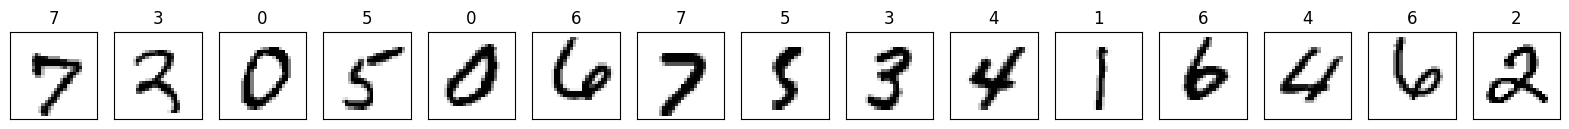

In [14]:
peek_idx(idx3 = r"./MNIST/train-images.idx3-ubyte", idx1 = r"./MNIST/train-labels.idx1-ubyte")

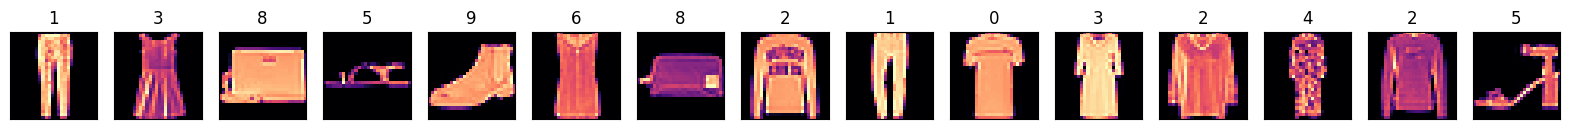

In [16]:
peek_idx(idx3 = r"./Fashion-MNIST/train-images-idx3-ubyte", idx1 = r"./Fashion-MNIST/train-labels-idx1-ubyte", colormap = "magma")

In [62]:
class NNetworkMinimal:

    """
    A class representing a minimal neural network with one input layer, one hidden layer and an output layer
    """
    
    def __init__(self, nodes_in: np.uint64, nodes_hid: np.uint64, nodes_out: np.uint64, alpha: float = 0.001) -> None:
        """
        
        """
        
        # privates
        self.__wh: NDArray[np.float64] = np.zeros((nodes_hid, nodes_in), dtype = np.float64)    # 10 x 784 matrix
        self.__bh: NDArray[np.float64] = np.zeros((nodes_hid, 1), dtype = np.float64)           # 10 x 1 column vector
        self.__wo: NDArray[np.float64] = np.zeros((nodes_hid, nodes_out), dtype = np.float64)   # 10 x 10 matrix
        self.__bo: NDArray[np.float64] = np.zeros((nodes_out, 1), dtype = np.float64)           # 10 x 1 column vector


    def __repr__(self) -> str:
        pass

    def train(self, data: NDArray[np.uint8], labels: NDArray[np.uint8]) -> None:
        pass

    def predict(self, data: NDArray[np.uint8]) -> NDArray[np.int64]:
        pass

In [63]:
%%timeit -n 1 -r 10

nn = NNetworkMinimal(784, 10, 10)

The slowest run took 22.17 times longer than the fastest. This could mean that an intermediate result is being cached.
25.3 µs ± 31 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


0

In [59]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
np.zeros((10, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# ***Fashion MNIST***
-------------------

![FASHION-MNIST](./Fashion-MNIST/fashion-mnist-sprite.png)

In [103]:
# there are 4 pieces of data
# a training images set, training labels, test set of images and test labels

os.listdir(r"./Fashion-MNIST/")

['fashion-mnist-sprite.png',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [28]:
# the datasets are binary files containing images as a string of 28 x 28 pixels

In [80]:
# the files prefixed with t10k contain the test data for 10,000 items (images and labels)
# each image is a 28 x 28 pixel greyscale image 
# and there are 10 different labels

fmnist: list[NDArray[np.uint8]] = []

for file in os.listdir(r"./Fashion-MNIST/")[1:]:
    with open(f"./Fashion-MNIST/{file}", "rb") as fp:
        fmnist.append(np.fromfile(fp, dtype = np.uint8))

In [32]:
# so it turns out we just have pixel values in 8 bits
# the training dataset contains 60,000 such images

60_000 * 28 * 28

47040000

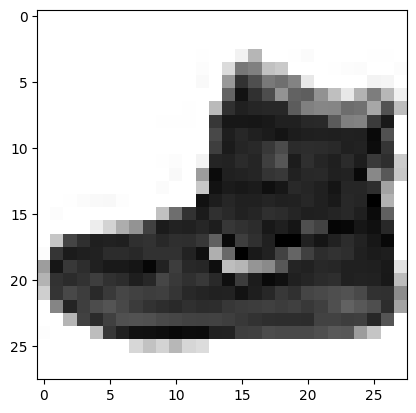

In [39]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# looks like a shoe 

plt.imshow(train_x[16:][: 28 * 28].reshape(28, 28), cmap = "binary")
plt.show()

In [104]:
# labels seem to be binary ASCII values separated by tabs (\t)
